# Data Acquiring

In [1]:
import zipfile
with zipfile.ZipFile('archive.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [2]:
import os
data_dir = "Alzheimer_s Dataset"
print(os.listdir(data_dir))

['test', 'train']


In [3]:
data_dir += "/train"
print(os.listdir(data_dir))
#C:\Users\acayt\Documents\GitHub\Brain-MRI-Alzheimers-Prediction\Alzheimer_s Dataset\train

['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


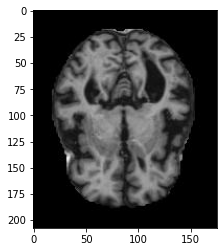

In [4]:
temp_dir = data_dir + "/MildDemented"

import cv2
import matplotlib.pyplot as plt

for img in os.listdir(temp_dir):
    img_array = cv2.imread(os.path.join(temp_dir, img))
    #print(img_array)
    plt.imshow(img_array)
    plt.show()
    break

In [5]:
print(img_array.shape)

(208, 176, 3)


# Data Preprocessing

In [9]:
classes = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

for alzheimers_class in classes:
    container = []
    temp_dir = data_dir + "/" + alzheimers_class
    for file in os.listdir(temp_dir):
        container.append(file)
    print(alzheimers_class, ": ", len(container))

MildDemented :  717
ModerateDemented :  52
NonDemented :  2560
VeryMildDemented :  1792


The number of data samples for 'ModerateDemented' is considerably low, compared to the other classes. So we'll need to generate more samples for that particular class by augmenting the already-present-samples.

In [10]:
import tensorflow as tf

In [11]:
# to augment images and create more samples

image_generator = tf.keras.preprocessing.image.ImageDataGenerator(brightness_range=[0.8, 1.2], zoom_range=[0.99, 1.01], horizontal_flip=True, fill_mode='nearest')

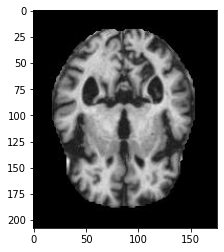

FileNotFoundError: [Errno 2] No such file or directory: 'preview\\moderateDem_0_485.jpg'

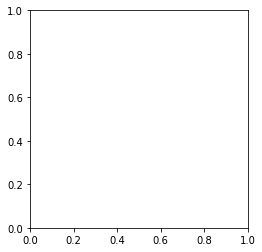

In [34]:
temp_dir = data_dir + "/ModerateDemented"
for img in os.listdir(temp_dir):
    temp_image = tf.keras.preprocessing.image.load_img(os.path.join(temp_dir, img))
    plt.imshow(temp_image)
    plt.show()
    img_array = tf.keras.preprocessing.image.img_to_array(temp_image)
    img_array = img_array.reshape((1,) + img_array.shape)
    ele = image_generator.flow(img_array, batch_size=1, save_to_dir="preview", save_prefix="moderateDem", save_format="jpg")
    #print(img, temp_image)
    #temp_image = tf.keras.preprocessing.image.array_to_img(img_array)
    plt.imshow(ele)
    plt.show()
    break